In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/salary.csv')
data

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [4]:
data.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


In [5]:
data.shape

(32561, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [7]:
income_set = set(data['income'])
data['income']=data['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(data.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [8]:
X=data.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [9]:
Y=data.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train,X_test)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]] [[ 5.60000000e+01  5.00000000e+00 -3.52647659e-15  4.00000000e+01]
 [ 1.90000000e+01  9.00000000e+00 -3.52647659e-15  2.50000000e+01]
 [ 2.30000000e+01  1.00000000e+01 -3.52647659e-15  3.50000000e+01]
 ...
 [ 4.40000000e+01  1.00000000e+01 -3.52647659e-15  5.50000000e+01]
 [ 5.80000000e+01  9.00000000e+00 -3.52647659e-15  5.00000000e+01]
 [ 5.50000000e+01  1.00000000e+01 -3.52647659e-15  4.50000000e+01]]


In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

Text(0, 0.5, 'Mean Error')

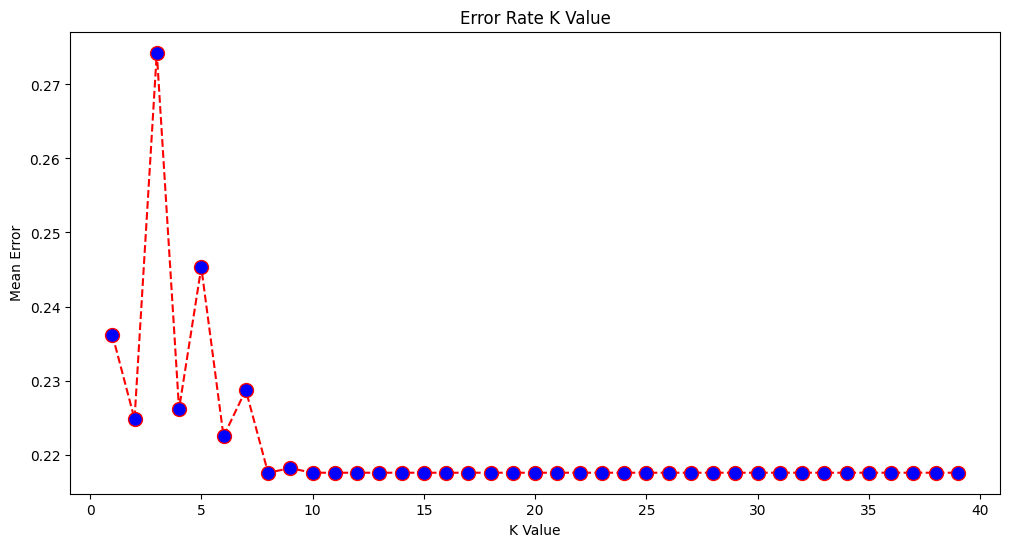

In [37]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i!=Y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [47]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[5952  241]
 [1530  418]]


0.7824591573516767

In [49]:
age=int(input("Enter New Employee's Age: "))
edu=int(input("Enter New Employee's Education: "))
cg=int(input("Enter New Employee's Capital Gain: "))
wh=int(input("Enter New Employee's Hour Per Week: "))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)

if result==1:
  print("Employee Earning More than 50K")
else:
  print("Employee Earning Less than 50K")

Enter New Employee's Age: 25
Enter New Employee's Education: 10
Enter New Employee's Capital Gain: 0
Enter New Employee's Hour Per Week: 30
[0]
Employee Earning Less than 50K
